# Solar power Generation prediction and Fault analysis.2023-04-24


importing all necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns',None) #it will display all columns no matter how many are there
pd.set_option('display.max_rows',None) #it will display all rows no matter how many are there
pd.set_option('display.precision',3) # setting decimal points to be 3 for floating value columns

Importing data

In [4]:
GererationData=pd.read_csv(r"C:\Users\Barry\Desktop\projects\Solar energy fault analysis\Plant_2_Generation_data.csv")
WeatherData=pd.read_csv(r"C:\Users\Barry\Desktop\projects\Solar energy fault analysis\plant_2_Weather_Sensor_Data.csv")

In [5]:
GererationData.head(3)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000,2.429e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000,1.215e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333,2.248e+09


In [6]:
WeatherData.head(3)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.005,25.061,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.881,24.422,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682,24.427,0.0


# Preprocesing

adjusting DATE_TIME column of GeneartionData and WeatherData  to datetime format("%Y-%m-%d %H:%M")

In [7]:
GererationData["DATE_TIME"]=pd.to_datetime(GererationData["DATE_TIME"],format='%Y-%m-%d %H:%M')
WeatherData["DATE_TIME"]=pd.to_datetime(WeatherData["DATE_TIME"],format='%Y-%m-%d %H:%M:%S')

Merge both GenerationData and WeatherData as they belong to same plant

In [8]:
df=pd.merge(GererationData.drop(columns=['PLANT_ID']),WeatherData.drop(columns=['PLANT_ID','SOURCE_KEY']),on='DATE_TIME')

In [9]:
df.head(3)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.000,2.429e+06,27.005,25.061,0.0
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.000,1.215e+09,27.005,25.061,0.0
2,2020-05-15,9kRcWv60rDACzjR,0.0,0.0,3075.333,2.248e+09,27.005,25.061,0.0


Creating seperate Data and time columns for analysis purpose

In [10]:
df["DATE"]=pd.to_datetime(df["DATE_TIME"]).dt.date
df["TIME"]=pd.to_datetime(df["DATE_TIME"]).dt.time
df["DAY"]=pd.to_datetime(df["DATE_TIME"]).dt.day
df["MONTH"]=pd.to_datetime(df["DATE_TIME"]).dt.month
df["WEEK"]=pd.to_datetime(df["DATE_TIME"]).dt.week

In [11]:
df['HOURS'] = pd.to_datetime(df['TIME'],format='%H:%M:%S').dt.hour
df['MINUTES'] = pd.to_datetime(df['TIME'],format='%H:%M:%S').dt.minute
df['TOTAL MINUTES PASS'] = df['MINUTES'] + df['HOURS']*60

In [12]:
# add date as string column
df["DATE_STRING"] = df["DATE"].astype(str) # add column with date as string
df["HOURS"] = df["HOURS"].astype(str)
df["TIME"] = df["TIME"].astype(str)

df.head(3)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.000,2.429e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.000,1.215e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
2,2020-05-15,9kRcWv60rDACzjR,0.0,0.0,3075.333,2.248e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67698 entries, 0 to 67697
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
 9   DATE                 67698 non-null  object        
 10  TIME                 67698 non-null  object        
 11  DAY                  67698 non-null  int64         
 12  MONTH                67698 non-null  int64         
 13  WEEK                 67698 non-

In [14]:
df.isnull().sum() #There is no null values

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
WEEK                   0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

In [15]:
df.describe()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,WEEK,MINUTES,TOTAL MINUTES PASS
count,67698.000,67698.000,67698.000,6.770e+04,67698.000,67698.000,67698.000,67698.000,67698.000,67698.000,67698.000,67698.000
mean,246.702,241.278,3294.890,6.589e+08,27.987,32.607,0.229,15.531,5.530,22.563,22.517,714.330
std,370.570,362.112,2919.448,7.297e+08,4.021,11.226,0.309,8.528,0.499,1.475,16.764,415.672
min,0.000,0.000,0.000,0.000e+00,20.942,20.265,0.000,1.000,5.000,20.000,0.000,0.000
25%,0.000,0.000,272.750,1.996e+07,24.570,23.686,0.000,9.000,5.000,21.000,15.000,360.000
50%,0.000,0.000,2911.000,2.826e+08,26.910,27.434,0.019,16.000,6.000,23.000,30.000,720.000
75%,446.592,438.215,5534.000,1.348e+09,30.913,40.019,0.431,22.000,6.000,24.000,45.000,1080.000
max,1420.933,1385.420,9873.000,2.248e+09,39.182,66.636,1.099,31.000,6.000,25.000,45.000,1425.000


In [16]:
df.shape

(67698, 18)

Converting "SOURCE_KEY" categorical data to numerical 

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['SOURCE_KEY']=encoder.fit_transform(df["SOURCE_KEY"])
df.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2020-05-15,0,0.0,0.0,9425.000,2.429e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
1,2020-05-15,1,0.0,0.0,0.000,1.215e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
2,2020-05-15,2,0.0,0.0,3075.333,2.248e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
3,2020-05-15,3,0.0,0.0,269.933,1.704e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
4,2020-05-15,4,0.0,0.0,3177.000,1.994e+07,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15


In [18]:
df.SOURCE_KEY.value_counts()

21    3259
13    3259
2     3259
19    3259
18    3259
5     3259
6     3259
17    3259
16    3259
9     3259
1     3259
12    3259
15    3195
0     3195
10    3195
7     3195
3     3195
11    3195
14    2355
8     2355
4     2355
20    2355
Name: SOURCE_KEY, dtype: int64

# EDA

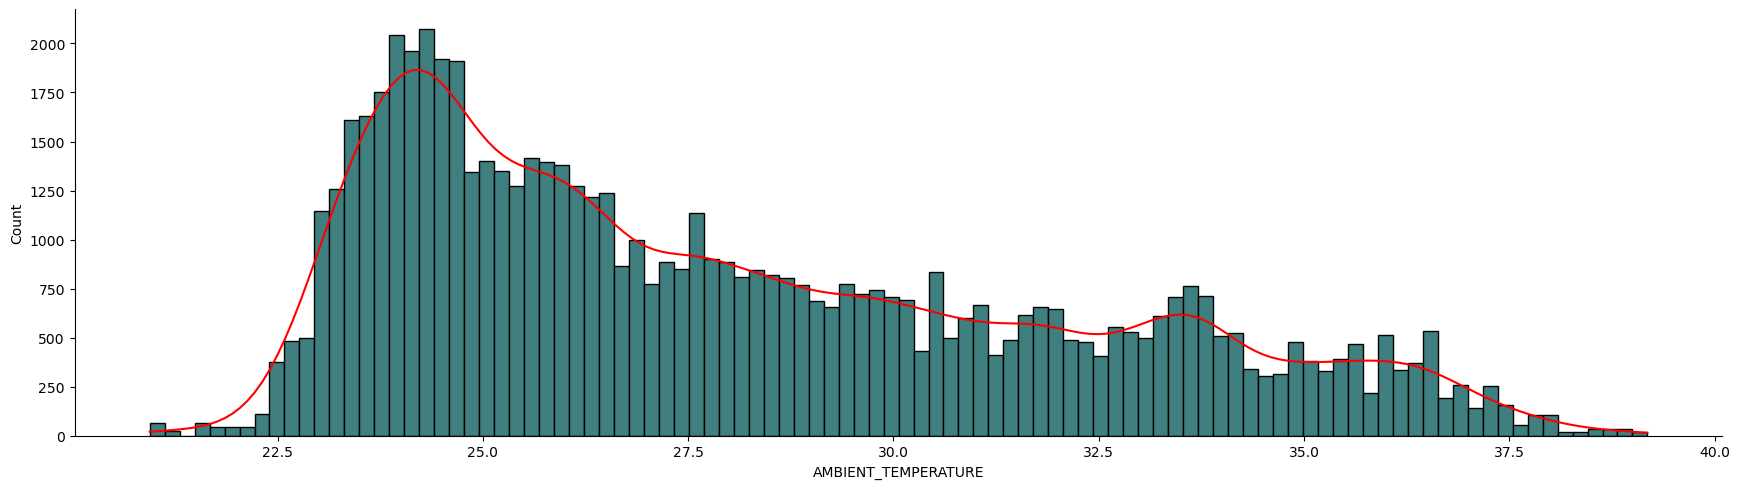

In [19]:
sns.displot(data=df, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

In [20]:
k=df['DATE'].nunique()
print(f'Data of solar Generation if of {k} days')

Data of solar Generation if of 34 days


# Fault and abnormality detection

 Multiple Plotting of DC_POWER generation on per day basis.

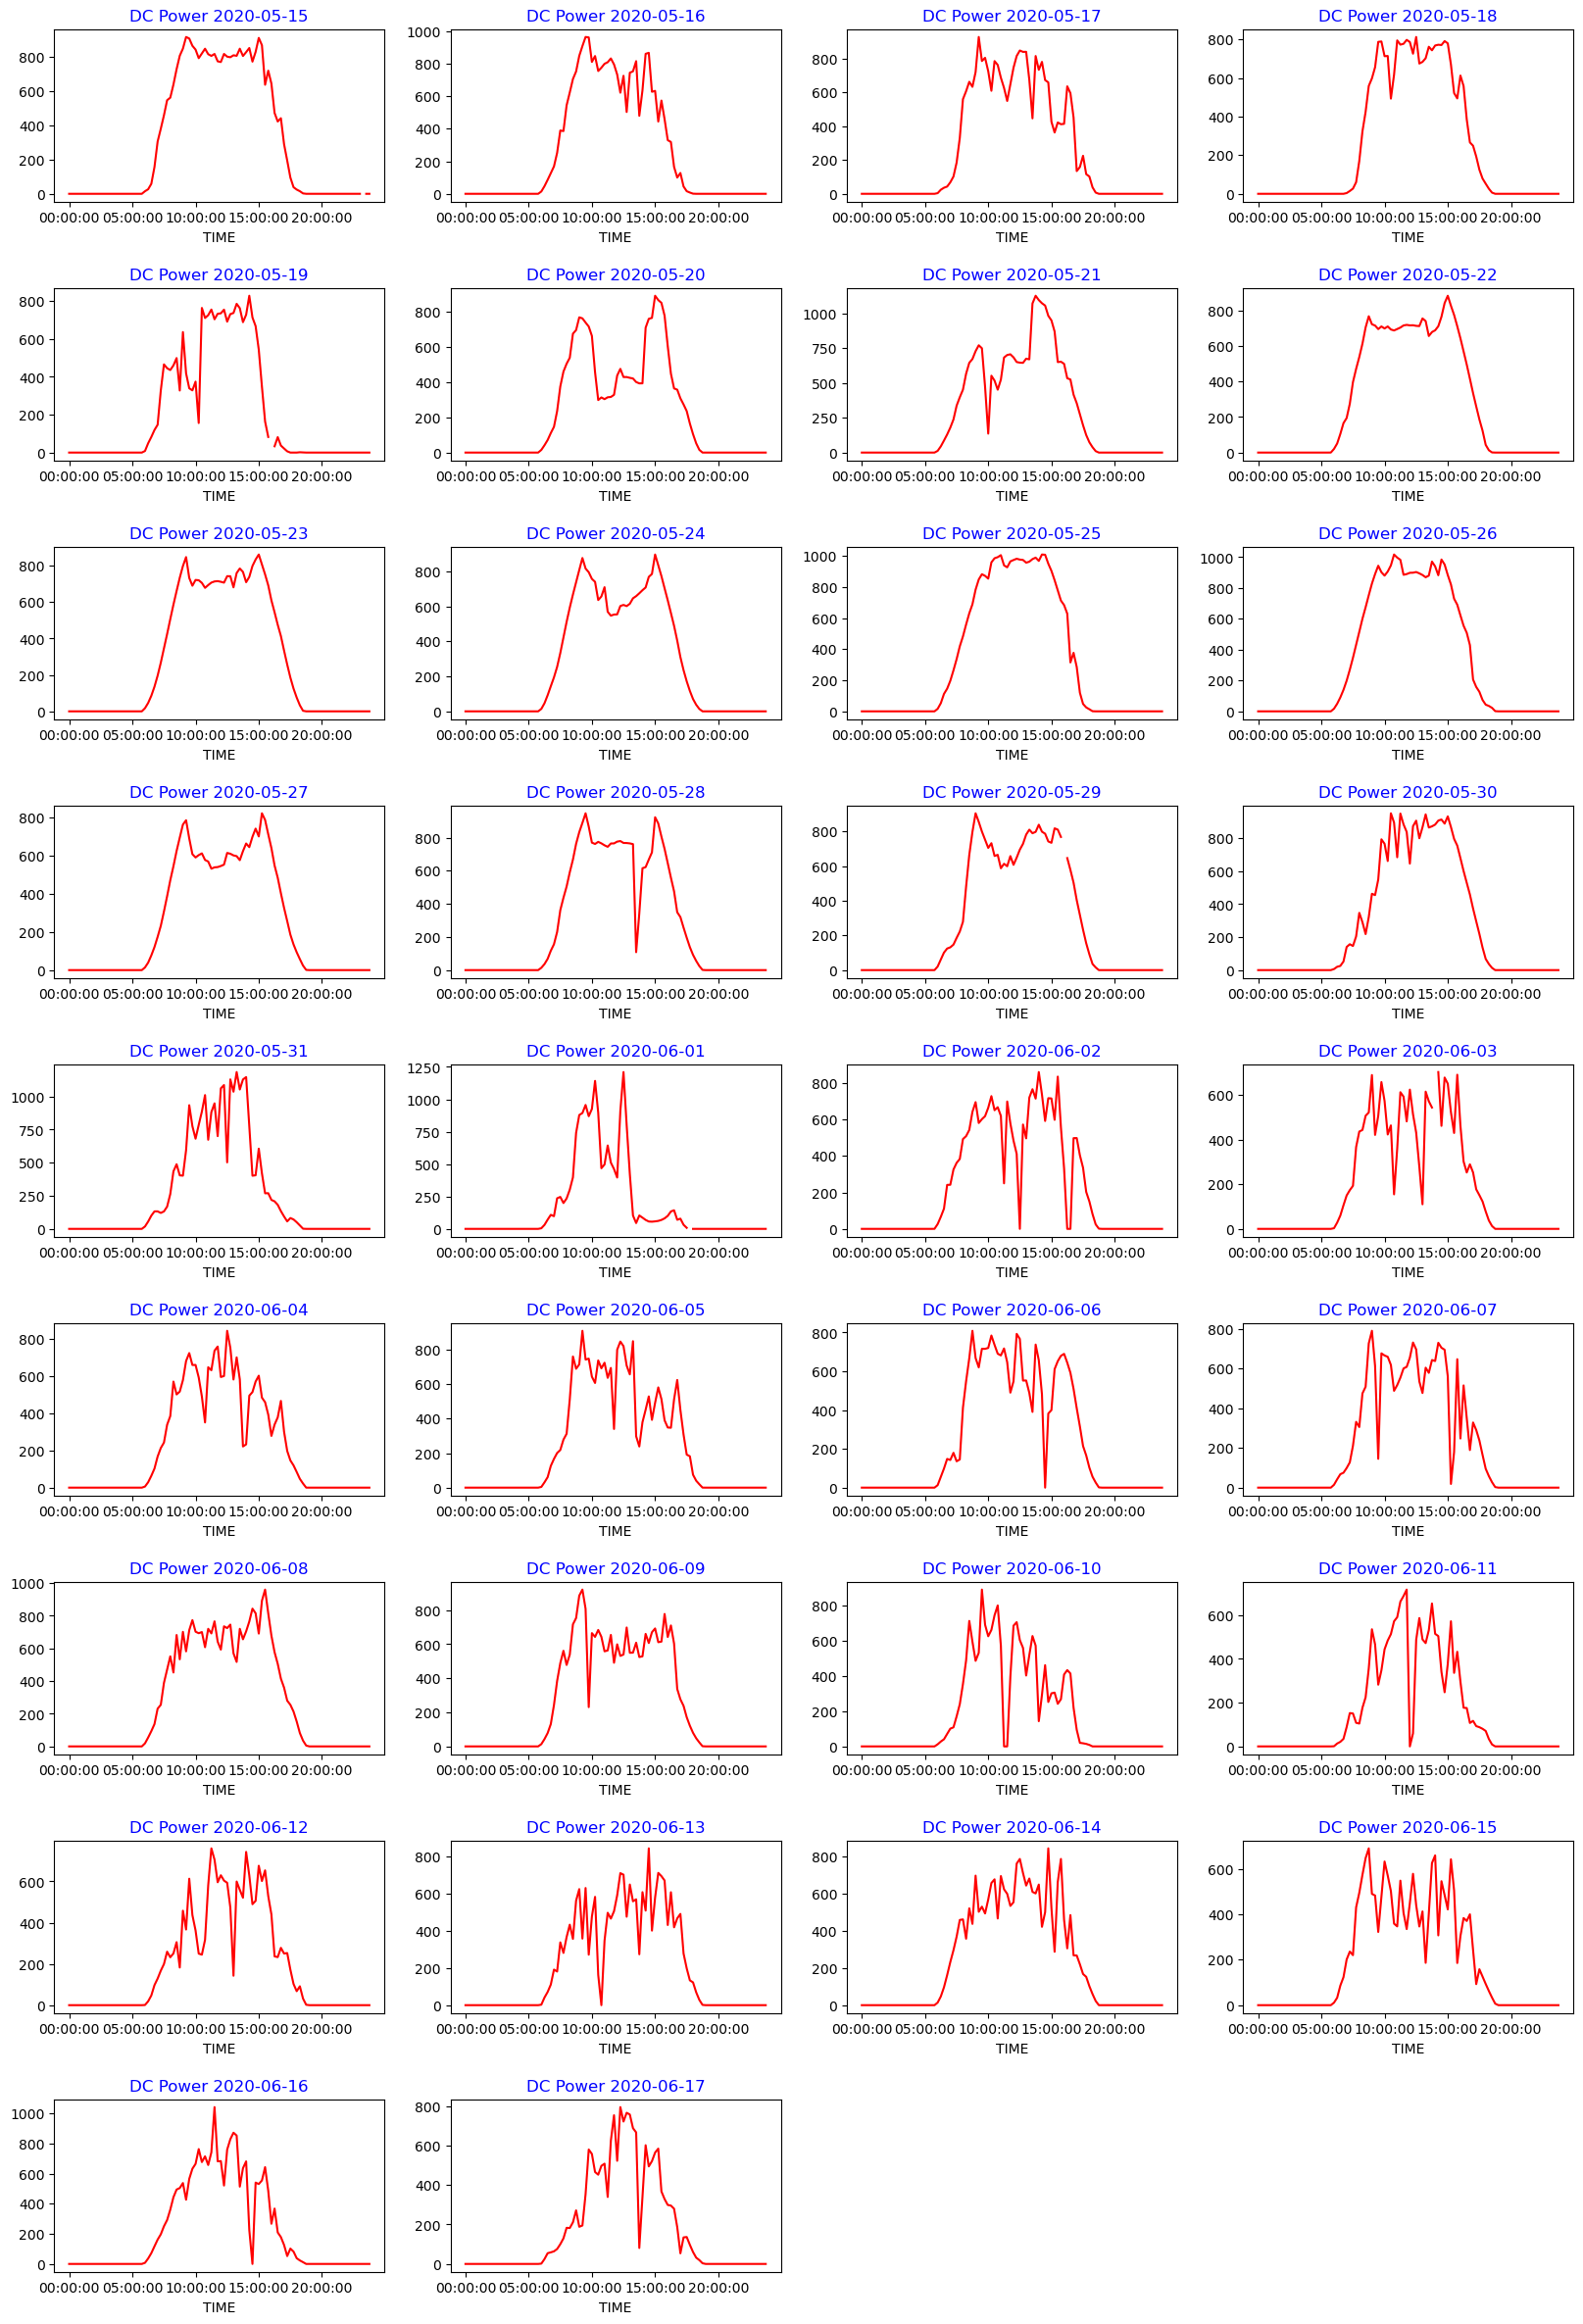

In [21]:
solar_dc=df.pivot_table(values="DC_POWER",index="TIME",columns="DATE")
def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_dc, row=12, col=4)

**Form the per day DC_POWER generation graph we can find that, most of the days there is a some fluctuation in the power generation.**

*Less Fluctuation in DC_POWER generation is observed in these days.*

> 1. 2020-05-15
> 2. 2020-05-18
> 3. 2020-05-22
> 4. 2020-05-23
> 5. 2020-05-24
> 6. 2020-05-25
> 7. 2020-05-26

*High Fluctuation in DC_POWER generation is observed in these days.*

> 1. 2020-05-19
> 2. 2020-05-28
> 3. 2020-05-29
> 4. 2020-06-02
> 5. 2020-06-03
> 6. 2020-06-04
> 7. 2020-06-13
> 8. 2020-06-14
> 9. 2020-06-17

*Very High Fluctuation & Reduction in DC_POWER generation is observed in these days.*

> 1. 2020-06-03
> 2. 2020-06-11
> 3. 2020-06-12
> 4. 2020-06-15

**Note: Reason for very high Fluctuation & Reduction in DC_POWER generation is due to fault in the system or may be fluctuation in weather or due to clouds etc. which need to be analyse further**

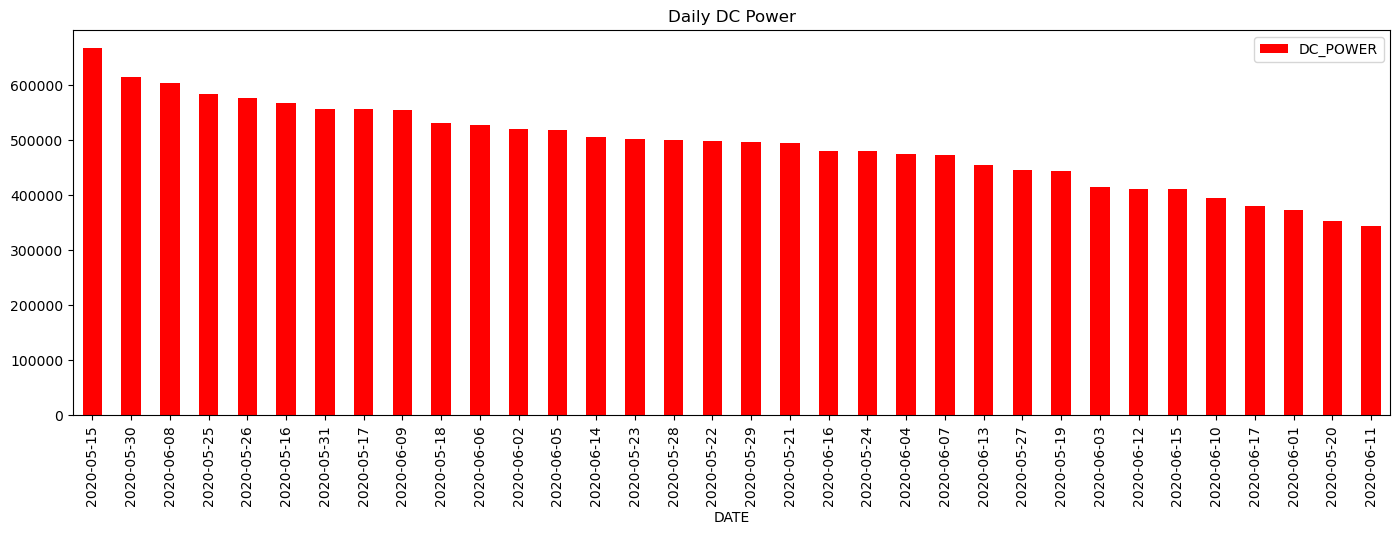

In [22]:
daily_dc = df.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')
plt.title('Daily DC Power')
plt.show()

**Form the per day DC_POWER generation graph we can find the average power generation per day.**

> *Highest average DC_POWER Generation is on*: **2020-05-15**

> *Lowest average DC_POWER Generation is on* : **2020-06-11**

# Day vs irradiation generation plots

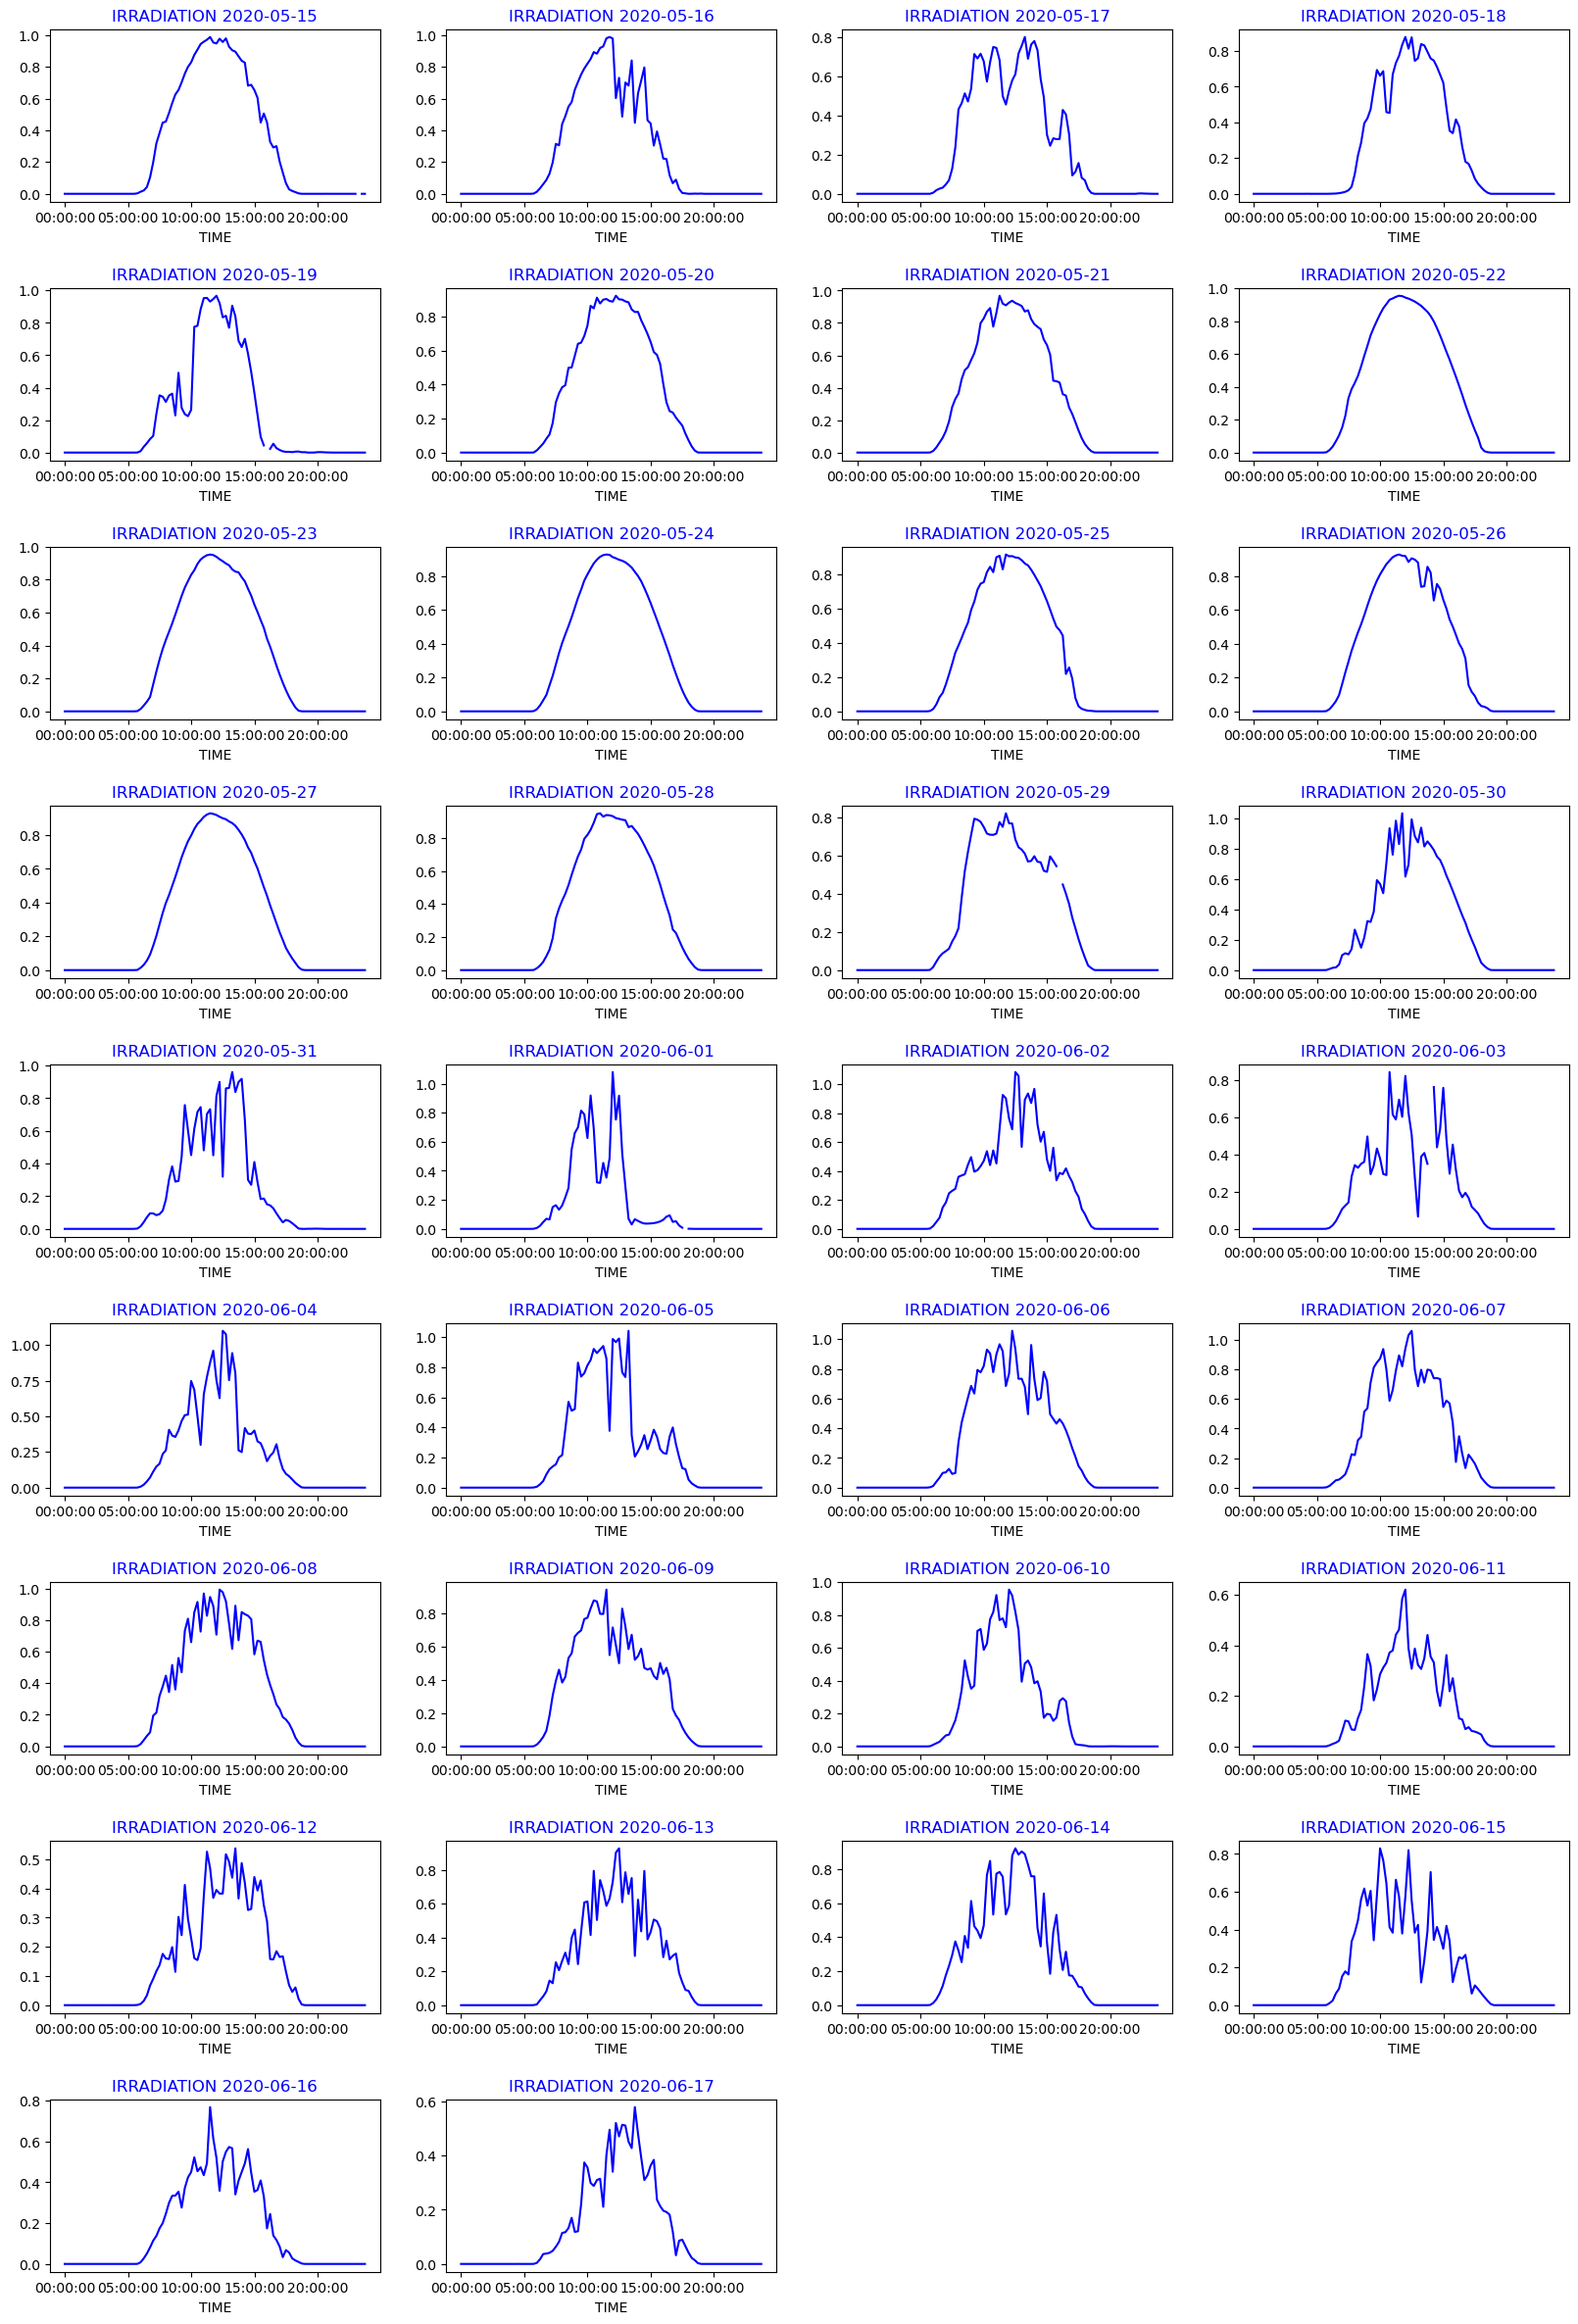

In [23]:
solar_irradiation = df.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_irradiation, row=12, col=4)

* Irradiation graph pattern is looking similar to the that of Per day DCPOWER generation graph.

* It is becouse solar power generation is directly proportional to the irradiation at the moment.

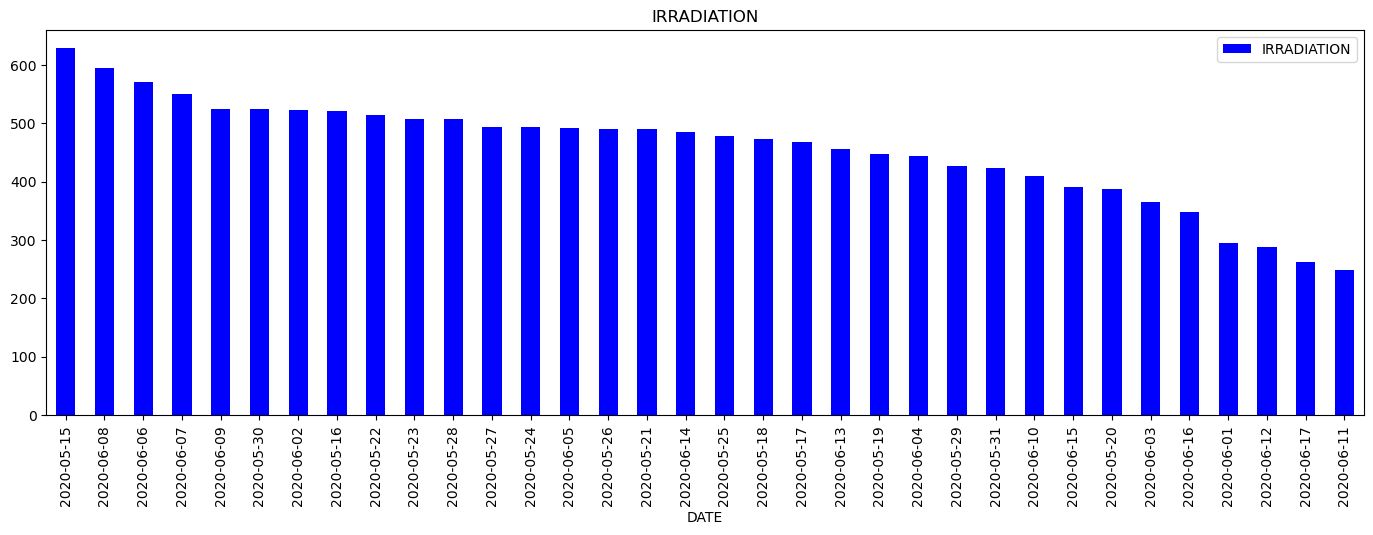

In [24]:
daily_irradiation = df.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('IRRADIATION')
plt.show()

# * Day VS Ambient tempurature plots

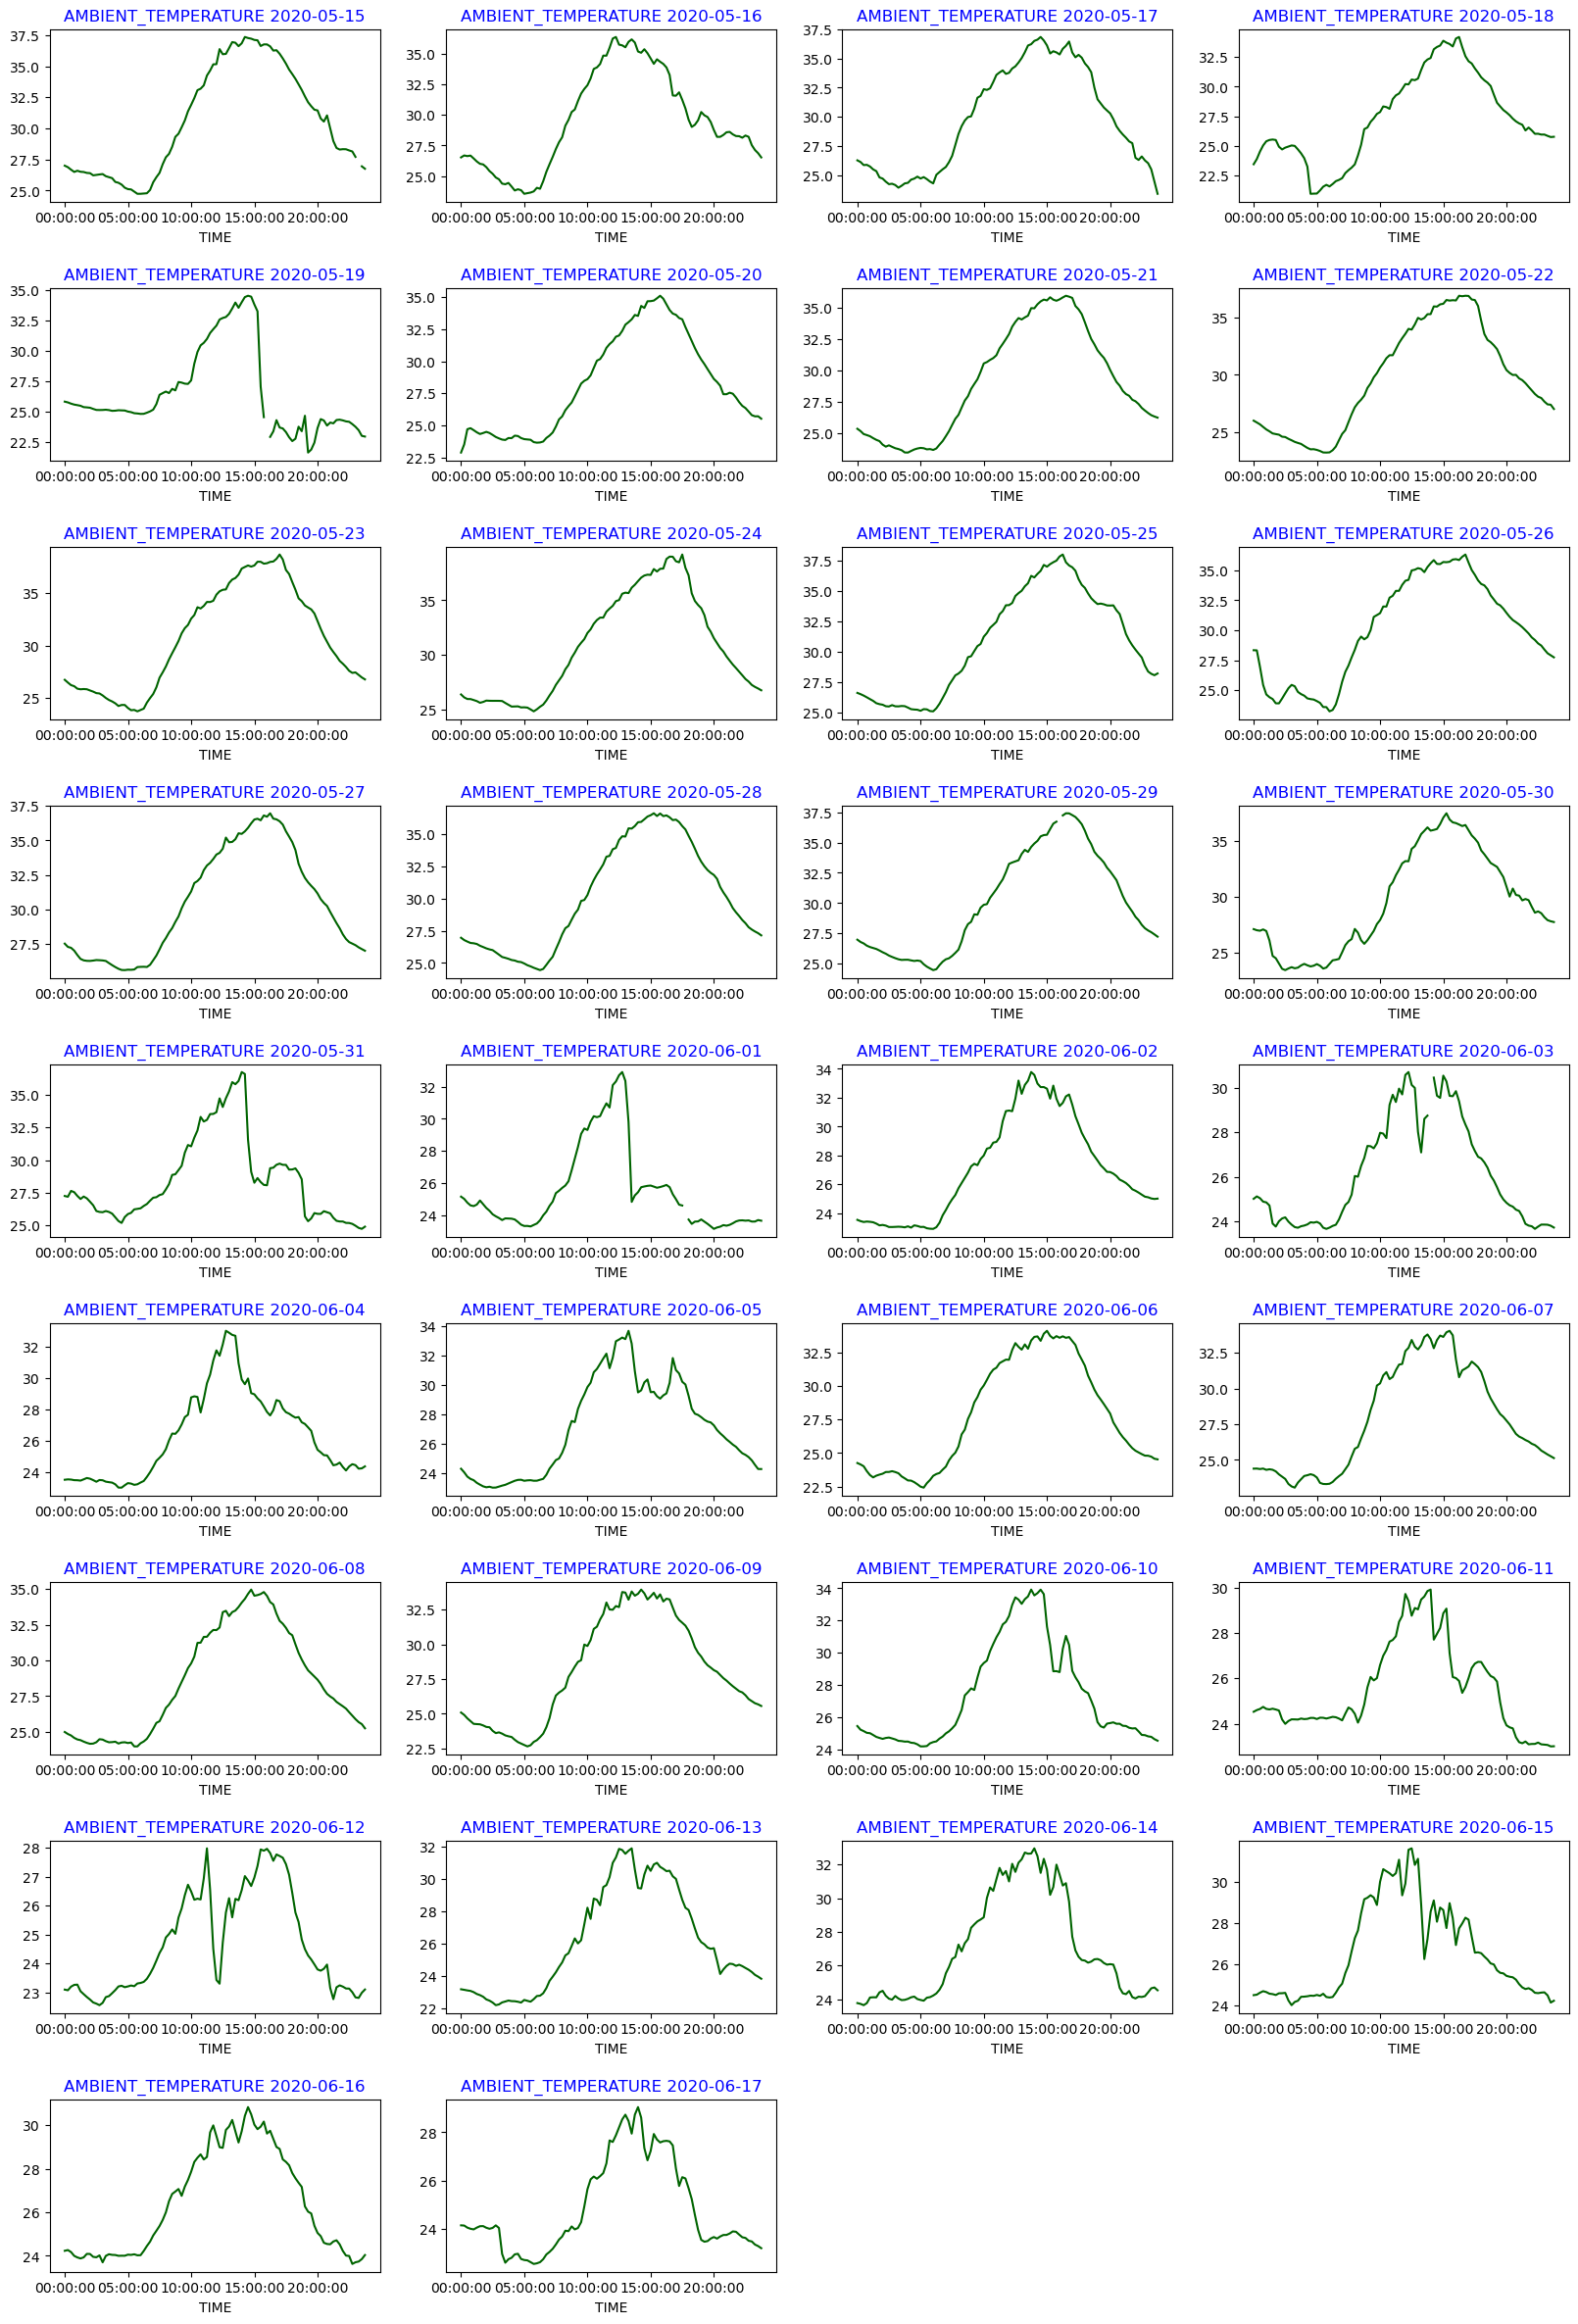

In [25]:
solar_ambiant_temp = df.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='darkgreen')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_ambiant_temp, row=12, col=4)

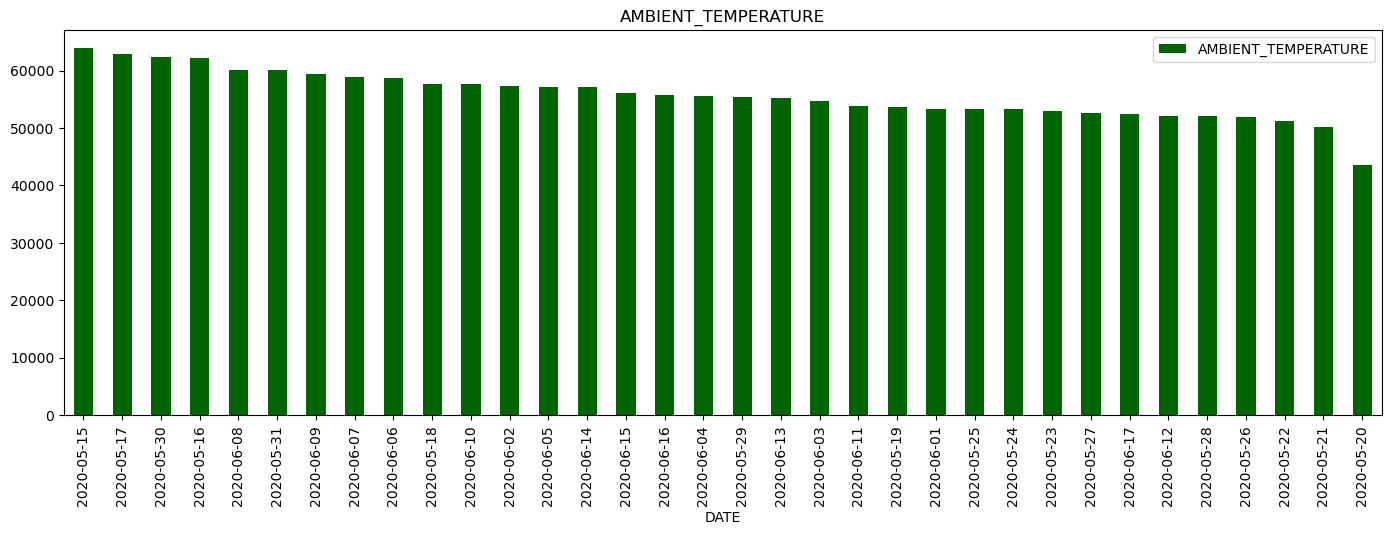

In [26]:
daily_ambient_temp = df.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='darkgreen')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

# Highest and lowest DC_POWER generation comparison

***Major Environmental Factors affecting the of solar power generation are***

>Solar irradiance: This is the amount of solar radiation that reaches the earth's surface. The efficiency of solar panels depends on the amount and quality of sunlight they receive. Factors such as cloud cover, atmospheric pollution, and the angle of the sun can all affect the amount of solar irradiance.

>Temperature: The efficiency of solar panels decreases as their temperature increases. High temperatures can reduce the output of solar panels and can even damage them over time. It is important to consider the effect of temperature when designing solar power systems.

>Wind speed: High wind speeds can damage solar panels and other components of solar power systems. Wind also affects the cooling of solar panels, which can affect their efficiency.

>Humidity: High humidity can reduce the efficiency of solar panels by increasing the amount of dust and other particles that accumulate on the surface of the panels.

>The thickness of clouds: is also a factor in how much sunlight your solar panels can soak up. We may see thicker clouds in winter too and this is something else to look out for. It’s hard for sunlight to travel through thick clouds, which will affect your solar power system’s output

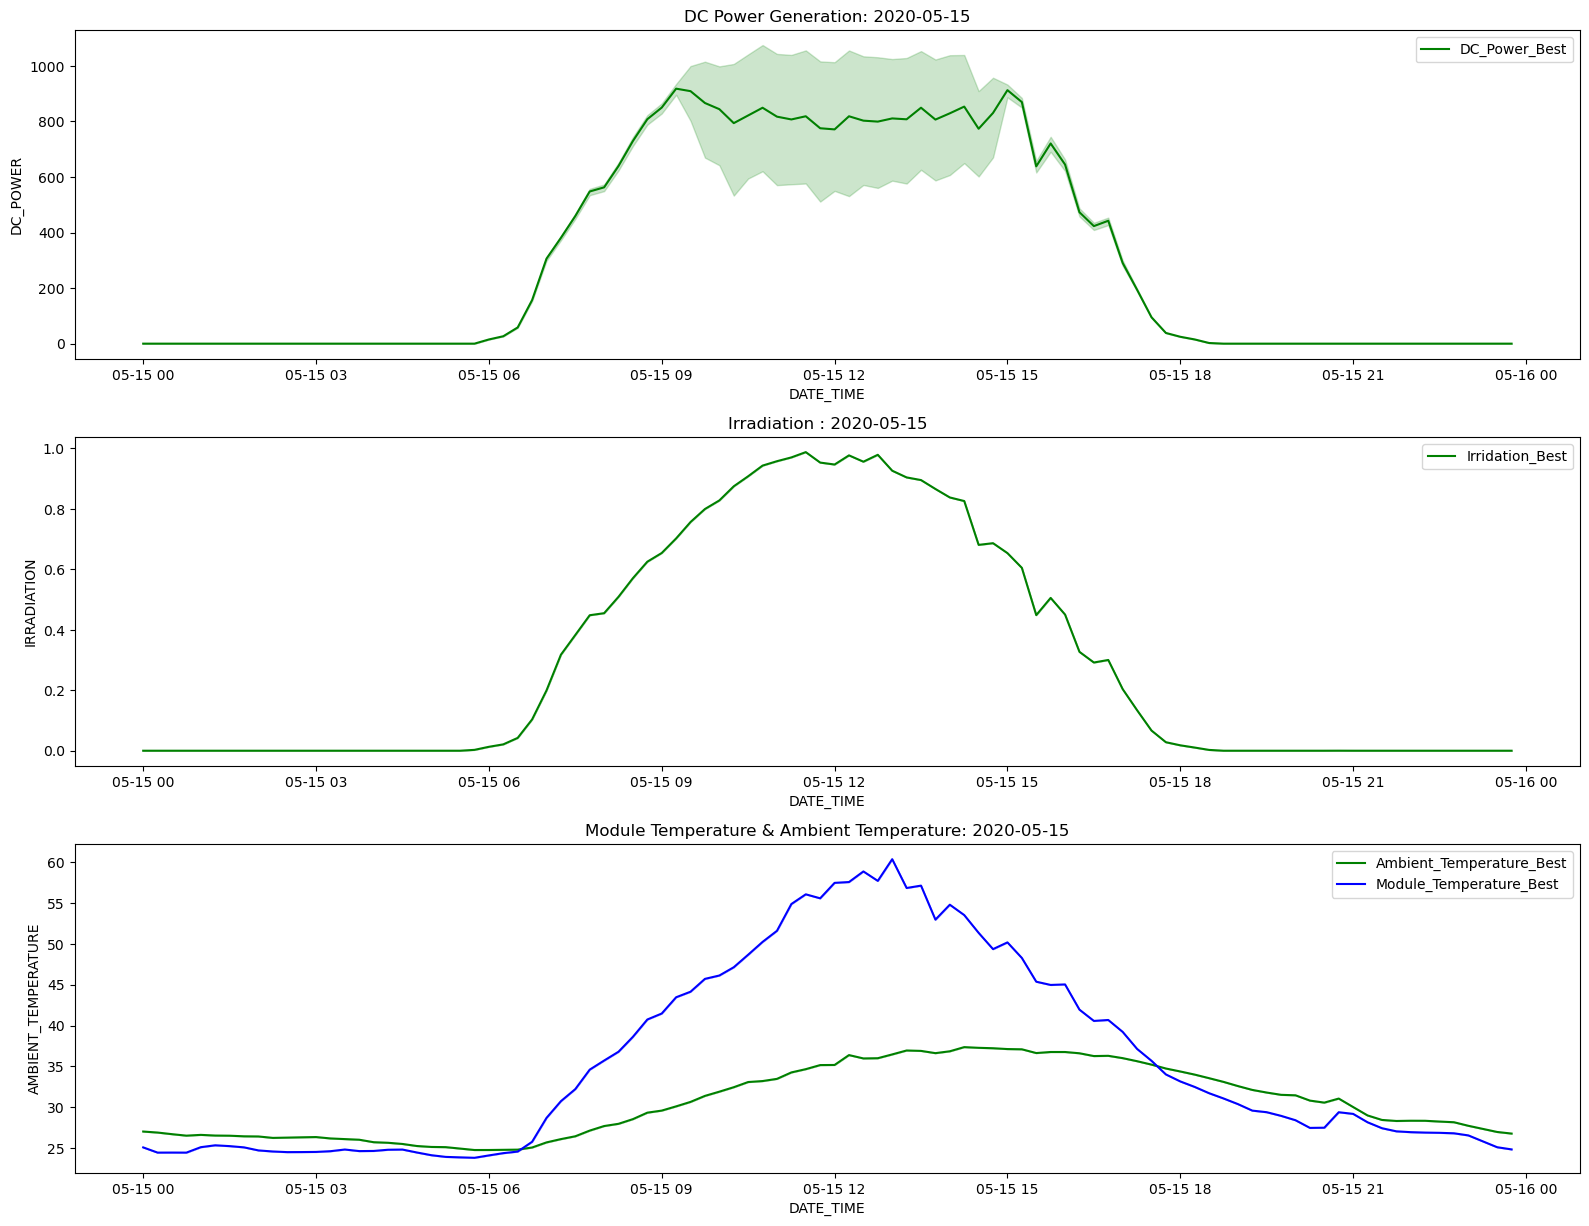

In [27]:
#Highest DC_POWER Generation 

plt.figure(figsize=(16,16))

date=["2020-05-15"]

plt.subplot(411)
sns.lineplot(x=df[df["DATE_STRING"].isin(date)].DATE_TIME, y=df[df["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Best",color='green');
plt.title("DC Power Generation: {}" .format(date[0]))

plt.subplot(412)
sns.lineplot(x=df[df["DATE_STRING"].isin(date)].DATE_TIME,y= df[df["DATE_STRING"].isin(date)].IRRADIATION, label="Irridation_Best",color='green');
plt.title("Irradiation : {}" .format(date[0]))

plt.subplot(413)
sns.lineplot(x=df[df["DATE_STRING"].isin(date)].DATE_TIME, y=df[df["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Best",color='green');
sns.lineplot(x=df[df["DATE_STRING"].isin(date)].DATE_TIME, y=df[df["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Best",color='blue');
plt.title("Module Temperature & Ambient Temperature: {}" .format(date[0]));

plt.tight_layout()
plt.show()

**From above graph we can say that Highest power is obtained, when we have *high ambient tempurature and *low solar module temperature**

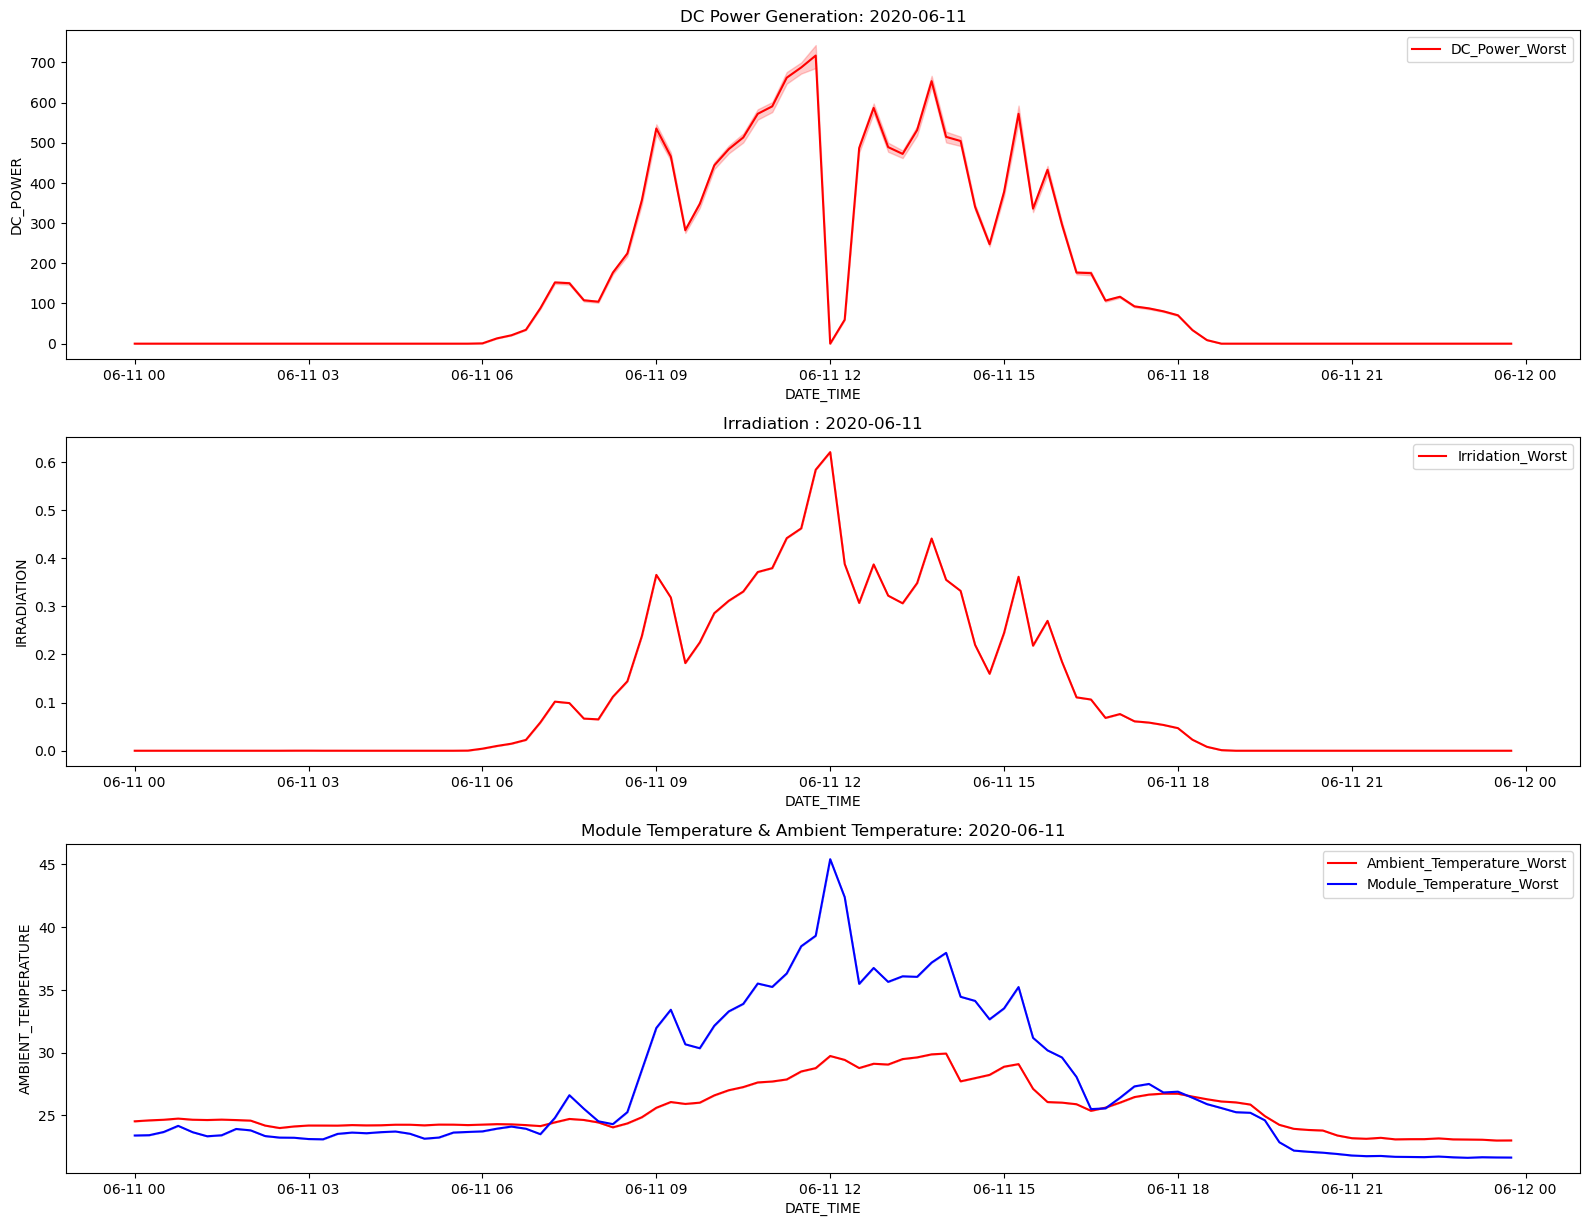

In [28]:
#lowest DC_POWER Generation
date=["2020-06-11"]
plt.figure(figsize=(16,16))

plt.subplot(411)
sns.lineplot(x=df[df["DATE_STRING"].isin(date)].DATE_TIME, y=df[df["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Worst",color='red');
plt.title("DC Power Generation: {}" .format(date[0]))

plt.subplot(412)
sns.lineplot(x=df[df["DATE_STRING"].isin(date)].DATE_TIME, y=df[df["DATE_STRING"].isin(date)].IRRADIATION, label="Irridation_Worst",color='red');
plt.title("Irradiation : {}" .format(date[0]))

plt.subplot(413)
sns.lineplot(x=df[df["DATE_STRING"].isin(date)].DATE_TIME, y=df[df["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Worst",color='red');
sns.lineplot(x=df[df["DATE_STRING"].isin(date)].DATE_TIME, y=df[df["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Worst",color='blue');
plt.title("Module Temperature & Ambient Temperature: {}" .format(date[0]));

plt.tight_layout()
plt.show()

**AT 12 pm there is sharp decline in DC_POWER due reduction in Irradiation and ambient Temperature.**

*Reasons could be*
>Heavy rain 

>Thick clouds

>power loss due to fault in the system.

# Overall Plant Inverter Efficiency 

In [51]:
efficiency=df.AC_POWER.values.sum()/df.DC_POWER.values.sum()*100
print(f"Overall plant efficiency is {efficiency:.3f}%")

Overall plant efficiency is 97.801%


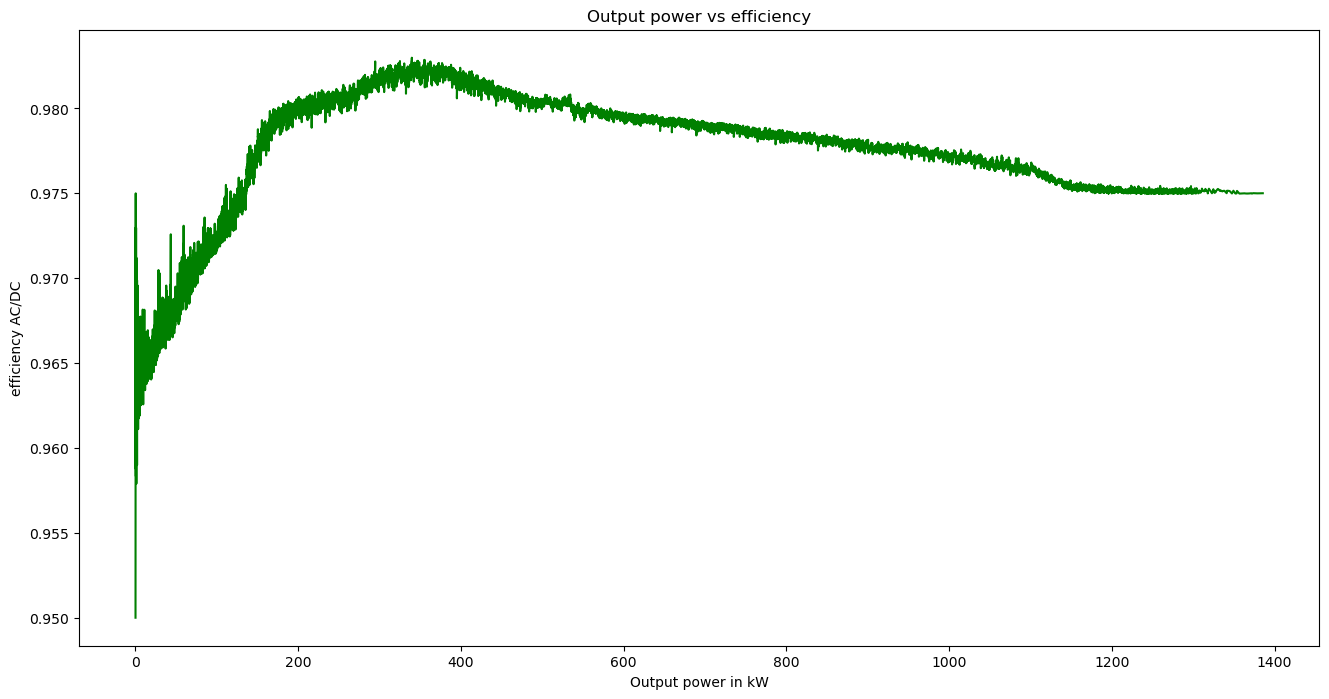

In [54]:
#Here we take all nonzero AC values and plot them on histogram
AC_list=[]
for i in df['AC_POWER']:
    if i>0:
        AC_list.append(i)

#Here we take all nonzero DC values and plot them on histogram
DC_list=[]
for i in df['DC_POWER']:
    if i>0:
        DC_list.append(i)

        
plt.figure(figsize=(16,8))
AC_list.sort()
DC_list.sort()

eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff,color='green')
plt.xlabel('Output power in kW')
plt.ylabel('efficiency AC/DC')
plt.title('Output power vs efficiency');

# Solar Power Prediction

In [56]:
df1 = df.copy()
X = df1[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y = df1['AC_POWER']

In [61]:
print(X.shape)
X.head(3)

(67698, 6)


,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER
0,9425.000,2.429e+06,27.005,25.061,0.0,0.0
1,0.000,1.215e+09,27.005,25.061,0.0,0.0
2,3075.333,2.248e+09,27.005,25.061,0.0,0.0
